## Train  model using PCA Components
###  Model is trained with XGBoost installed in notebook instance

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==0.90

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.7/676.7 kB 15.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for xgboost: filename=xgboost-0.90-cp310-cp310-macosx_11_0_arm64.whl size=1571892 sha256=1e3822da1e9f06862aa59f2343221e0979184f140fce79825890c44fbfc76f2d
  Stored in directory: /Users/ofotech_fitri/Library/Caches/pip/wheels/8e/59/d2/23e798a15a8c0c68e1b3b78b2f49bef35303ad6b299b5de64a
Successfully built xgboost
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list_pca.txt'
train_file = 'bike_train_pca.csv'
validation_file = 'bike_validation_pca.csv'
test_file = 'bike_test_pca.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,4.477337,3,0,0,2,2011,9,3,5,0,-0.024157,-0.117305
1,5.517453,3,0,1,1,2012,8,13,0,14,0.421581,-0.206154


In [8]:
df_validation.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,6.095825,3,0,1,2,2011,7,7,3,8,0.000338,-0.064822
1,5.961005,2,0,0,1,2011,6,11,5,13,0.225850,-0.105773


In [9]:
df_train.iloc[:,1:-2].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour
0,3,0,0,2,2011,9,3,5,0
1,3,0,1,1,2012,8,13,0,14


In [10]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [11]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150,n_estimators=150)

In [12]:
regressor

XGBRegressor(eta=0.1, max_depth=5, n_estimators=150, num_round=150,
             subsample=0.7)

In [13]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[12:26:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.90562	validation_1-rmse:3.91547
[1]	validation_0-rmse:3.52689	validation_1-rmse:3.53416
[2]	validation_0-rmse:3.18649	validation_1-rmse:3.19187
[3]	validation_0-rmse:2.87947	validation_1-rmse:2.8838
[4]	validation_0-rmse:2.6037	validation_1-rmse:2.60718
[5]	validation_0-rmse:2.35787	validation_1-rmse:2.36047
[6]	validation_0-rmse:2.13676	validation_1-rmse:2.13887
[7]	validation_0-rmse:1.93724	validation_1-rmse:1.9401
[8]	validation_0-rmse:1.75952	validation_1-rmse:1.76256
[9]	validation_0-rmse:1.59887	validation_1-rmse:1.60166
[10]	validation_0-rmse:1.45671	validation_1-rmse:1.45932
[11]	validation_0-rmse:1.32969	validation_1-rmse:1.33241
[12]	validation_0-rmse:1.21548	validation_1-rmse:1.21887
[13]	validation_0-rmse:1.10761	validation_1-rmse:1.11197
[14]	validation_0-rmse:1.01626	validation_1-rmse:1.02119
[15]	validation_0-rmse:0.936372	validation

XGBRegressor(eta=0.1, max_depth=5, n_estimators=150, num_round=150,
             subsample=0.7)

In [14]:
eval_result = regressor.evals_result()

In [15]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

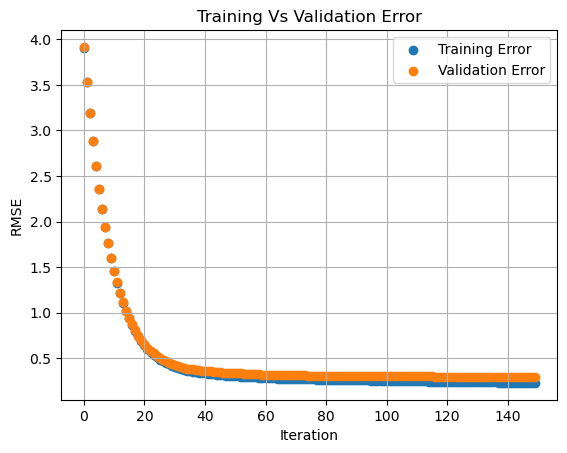

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

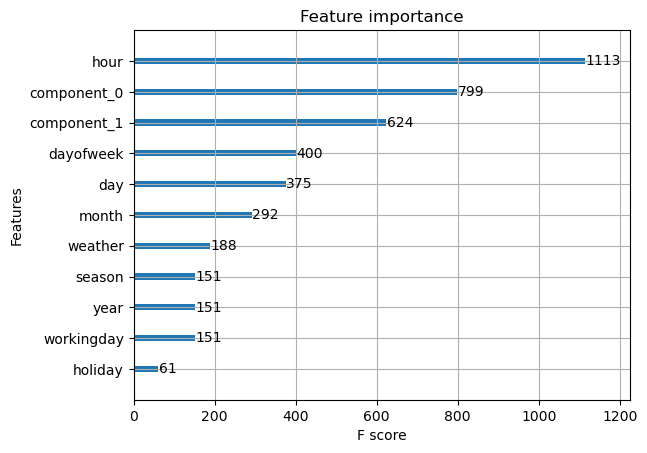

In [17]:
xgb.plot_importance(regressor)

In [18]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [19]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [20]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577


In [21]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [22]:
X_test.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370
1,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577


In [23]:
result = regressor.predict(X_test)

In [24]:
result[:5]

array([2.378478 , 2.0100071, 1.5464854, 1.1762215, 1.111353 ],
      dtype=float32)

In [25]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [26]:
df_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370,9.788471
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577,6.463371
2,2011-01-20 02:00:00,1,0,1,1,2011,1,20,3,2,-0.236760,-0.119577,3.694940
3,2011-01-20 03:00:00,1,0,1,1,2011,1,20,3,3,-0.181841,0.053887,2.242101
4,2011-01-20 04:00:00,1,0,1,1,2011,1,20,3,4,-0.181841,0.053887,2.038467


In [27]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count


In [28]:
df_test['count'] = df_test['count'].map(adjust_count)

In [29]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count


In [30]:
df_test[['datetime','count']].to_csv('predicted_count_pca.csv',index=False)